<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
# imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,
                             plot_confusion_matrix,
                             classification_report,
                             precision_score,
                             recall_score)

import seaborn as sns
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Data Preparation

In [3]:
data.isnull().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

In [4]:
data.duplicated().sum()

58

In [5]:
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6985 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              6985 non-null   int64  
 1   Conjuge                  6985 non-null   object 
 2   Dependentes              6985 non-null   object 
 3   MesesDeContrato          6985 non-null   int64  
 4   TelefoneFixo             6985 non-null   object 
 5   VariasLinhasTelefonicas  6985 non-null   object 
 6   ServicoDeInternet        6985 non-null   object 
 7   SegurancaOnline          6985 non-null   object 
 8   BackupOnline             6985 non-null   object 
 9   SeguroNoDispositivo      6985 non-null   object 
 10  SuporteTecnico           6985 non-null   object 
 11  TVaCabo                  6985 non-null   object 
 12  StreamingDeFilmes        6985 non-null   object 
 13  TipoDeContrato           6985 non-null   object 
 14  PagamentoOnline         

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Maior65Anos,6985.0,0.162921,0.369320,0.00,0.00,0.0,0.00,1.00
MesesDeContrato,6985.0,32.544023,24.492000,0.00,9.00,29.0,56.00,72.00
ContaMensal,6985.0,65.019764,30.003226,18.25,36.25,70.5,89.95,118.75


In [9]:
data.shape

(6985, 18)

In [10]:
data.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [11]:
(data['ServicoDeInternet'] == 'DSL').sum()

2415

In [12]:
data.ServicoDeInternet.value_counts()

FibraOptica    3085
DSL            2415
Nao            1485
Name: ServicoDeInternet, dtype: int64

In [13]:
lb = LabelEncoder()
data.Conjuge = lb.fit_transform(data.Conjuge)
data.Dependentes = lb.fit_transform(data.Dependentes) 
data.TelefoneFixo = lb.fit_transform(data.TelefoneFixo) 
data.VariasLinhasTelefonicas = lb.fit_transform(data.VariasLinhasTelefonicas) 
data.ServicoDeInternet = lb.fit_transform(data.ServicoDeInternet) 
data.SegurancaOnline = lb.fit_transform(data.SegurancaOnline) 
data.BackupOnline = lb.fit_transform(data.BackupOnline) 
data.SeguroNoDispositivo = lb.fit_transform(data.SeguroNoDispositivo) 
data.SuporteTecnico = lb.fit_transform(data.SuporteTecnico)
data.TVaCabo = lb.fit_transform(data.TVaCabo)
data.StreamingDeFilmes = lb.fit_transform(data.StreamingDeFilmes)
data.TipoDeContrato = lb.fit_transform(data.TipoDeContrato)
data.PagamentoOnline = lb.fit_transform(data.PagamentoOnline)
data.FormaDePagamento = lb.fit_transform(data.FormaDePagamento)
data.Churn = lb.fit_transform(data.Churn)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6985 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              6985 non-null   int64  
 1   Conjuge                  6985 non-null   int64  
 2   Dependentes              6985 non-null   int64  
 3   MesesDeContrato          6985 non-null   int64  
 4   TelefoneFixo             6985 non-null   int64  
 5   VariasLinhasTelefonicas  6985 non-null   int64  
 6   ServicoDeInternet        6985 non-null   int64  
 7   SegurancaOnline          6985 non-null   int64  
 8   BackupOnline             6985 non-null   int64  
 9   SeguroNoDispositivo      6985 non-null   int64  
 10  SuporteTecnico           6985 non-null   int64  
 11  TVaCabo                  6985 non-null   int64  
 12  StreamingDeFilmes        6985 non-null   int64  
 13  TipoDeContrato           6985 non-null   int64  
 14  PagamentoOnline         

In [15]:
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,1,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,2,0,2,56.95,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,1,1,2,53.85,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,2,0,3,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,1,70.70,1


# Data Balancing

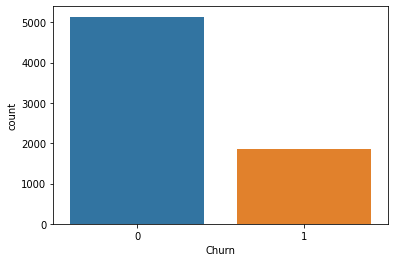

In [16]:
sns.countplot(data.Churn);

In [17]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [18]:
X.shape

(6985, 17)

In [19]:
y.shape

(6985,)

In [20]:
sm = SMOTE(random_state=123)
X, y = sm.fit_resample(X, y)

In [21]:
dataset = pd.concat([X, y], axis=1)

In [22]:
dataset.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,1,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,2,0,2,56.95,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,1,1,2,53.85,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,2,0,3,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,1,70.70,1


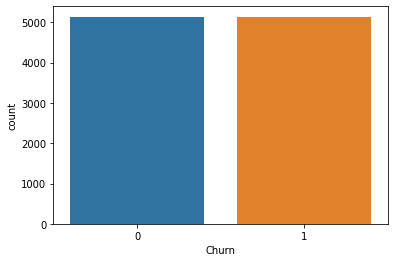

In [23]:
sns.countplot(dataset.Churn);

In [24]:
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

In [25]:
Xmaria = [[0,1,0,1,0,1,0,0,2,0,0,0,0,1,1,1,2.85]]

In [29]:
std = StandardScaler()
X_norm = std.fit_transform(X)
X_norm

array([[-0.40685732,  1.25325283, -0.53400435, ...,  0.80759016,
        -0.33880747, -1.34287751],
       [-0.40685732, -0.79792359, -0.53400435, ..., -1.23825184,
         0.6883057 , -0.40132197],
       [-0.40685732, -0.79792359, -0.53400435, ...,  0.80759016,
         0.6883057 , -0.50902759],
       ...,
       [-0.40685732, -0.79792359, -0.53400435, ...,  0.80759016,
         0.6883057 , -1.71450813],
       [-0.40685732, -0.79792359, -0.53400435, ...,  0.80759016,
        -1.36592063,  0.5950879 ],
       [-0.40685732, -0.79792359, -0.53400435, ..., -1.23825184,
        -1.36592063,  0.77301279]])

In [30]:
X_norm[1]

array([-0.40685732, -0.79792359, -0.53400435,  0.25469815,  0.32278328,
       -1.01872639, -1.27535224,  1.69097605, -0.89790938,  1.37435469,
       -0.76368013, -1.07585548, -1.07285767,  1.79219991, -1.23825184,
        0.6883057 , -0.40132197])

In [31]:
Xmaria_norm = std.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_norm

array([[-0.40685732,  1.25325283, -0.53400435, -1.12251821, -3.09805393,
         0.0439329 , -1.27535224, -0.75702195,  1.3933922 , -0.90975592,
        -0.76368013, -1.07585548, -1.07285767,  0.03738373,  0.80759016,
        -0.33880747, -2.28095868]])

In [32]:
# euclidean calculate
np.sqrt(np.sum(np.square(Xmaria_norm - X_norm[1])))

6.873731510549192

# K-NearNeighbors (Under the Table)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=123)

In [34]:
X_train.shape, y_train.shape

((8224, 17), (8224,))

In [35]:
X_test.shape, y_test.shape

((2056, 17), (2056,))

In [36]:
knn = KNeighborsClassifier(metric='euclidean').fit(X_train, y_train)

In [37]:
y_pred = knn.predict(X_test)

In [161]:
accuracy_knn = accuracy_score(y_test, y_pred)*100
print(f"Acuuracy Score: {round(accuracy_knn, 2)}%")

Acuuracy Score: 77.53%


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1033
           1       0.73      0.86      0.79      1023

    accuracy                           0.78      2056
   macro avg       0.78      0.78      0.77      2056
weighted avg       0.78      0.78      0.77      2056



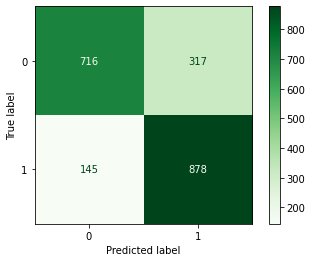

In [40]:
conf_matrix = plot_confusion_matrix(knn, X_test, y_test, cmap='Greens')

# Bernoulli Naive Bayes

In [41]:
bnb = BernoulliNB(binarize=np.median(X_train)).fit(X_train, y_train)

In [42]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 1, 1, ..., 1, 1, 0])

In [162]:
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)*100
print(f"Acuuracy Score: {round(accuracy_bnb, 2)}%")

Acuuracy Score: 74.71%


In [44]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1033
           1       0.72      0.80      0.76      1023

    accuracy                           0.75      2056
   macro avg       0.75      0.75      0.75      2056
weighted avg       0.75      0.75      0.75      2056



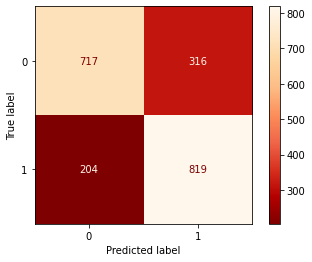

In [45]:
conf_matrix = plot_confusion_matrix(bnb, X_test, y_test, cmap='OrRd_r')

# Decision Tree Classifier

In [64]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=123).fit(X_train, y_train)

In [65]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 1, 1, ..., 0, 0, 0])

In [163]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)*100
print(f"Acuuracy Score: {round(accuracy_tree, 2)}%")

Acuuracy Score: 80.2%


In [67]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.79      0.82      0.81      1023

    accuracy                           0.80      2056
   macro avg       0.80      0.80      0.80      2056
weighted avg       0.80      0.80      0.80      2056



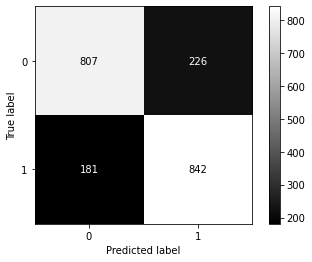

In [68]:
conf_matrix = plot_confusion_matrix(tree, X_test, y_test, cmap='gray')

# Metrics

In [164]:
score_tree = precision_score(y_test, y_pred_tree)*100
score_bnb = precision_score(y_test, y_pred_bnb)*100
score_knn = precision_score(y_test, y_pred)*100

In [165]:
recall_tree = recall_score(y_test, y_pred_tree)*100
reacll_bnb = recall_score(y_test, y_pred_bnb)*100
recall_knn = recall_score(y_test, y_pred)*100

In [166]:
accuracy_total = [[accuracy_tree, accuracy_bnb, accuracy_knn]]
score_total = [[score_tree, score_bnb, score_knn]]
recall_total = [[recall_tree, reacll_bnb, recall_knn]]

In [167]:
data_accuracy = pd.DataFrame(accuracy_total,columns=['tree', 'naive_bnb', 'knn'])

In [168]:
data_score = pd.DataFrame(score_total,columns=['tree', 'naive_bnb', 'knn'])

In [169]:
data_recall = pd.DataFrame(recall_total,columns=['tree', 'naive_bnb', 'knn'])

In [170]:
data_final = pd.concat([data_accuracy, data_score, data_recall], axis=0)

In [171]:
data_final = data_final.T

In [172]:
data_final.columns = ['accuracy', 'score', 'recall']
data_final

,accuracy,score,recall
tree,80.204280,78.838951,82.306940
naive_bnb,74.708171,72.158590,80.058651
knn,77.529183,73.472803,85.826002


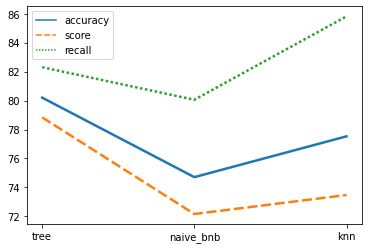

In [181]:
sns.lineplot(data=data_final, palette="tab10", linewidth=2.5);